# Assignment 3 (Decision Trees and Ensemble Learning)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
shows = pd.read_csv("netflix_titles.csv")
shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Part 1

In this assignment we are trying to predict the type of the netflix show. Use a decision tree model to calculate the accuracy for the model. We'll also plot the ROC plot.

In [3]:
n = 69
print(shows['type'][n])
print(shows['description'][n])

#movie: thriller? city? life? lifetime? when? holiday? turn? showdown?
#show: party? sets out? school? series? show? campus? sex? collection? tales?

TV Show
The writings of Nobel Prize winner Rabindranath Tagore come to life in this collection of tales set in early-20th-century Bengal.


In [4]:

X, y = shows.drop(['type', 'show_id'], axis='columns'), shows['type']



In [5]:
X

,title,director,cast,country,date_added,release_year,rating,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...
8802,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,NaN,NaN,NaN,1-Jul-19,2018,TV-Y7,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
# add columns for listed_in
lst = []
X[~X['listed_in'].isna()]['listed_in'].str.split(', ').map(lambda x: lst.extend(x))

listed_in_unique = pd.Series(lst).unique()
#print(len(listed_in_unique))
for col in listed_in_unique:
    X[col] = pd.Series(np.zeros(len(X)))

In [7]:
# add columns for director
lst = []
X[~X['director'].isna()]['director'].str.split(', ').map(lambda x: lst.extend(x))

listed_in_unique = pd.Series(lst).value_counts()
frame_directors = listed_in_unique.to_frame()
#display(frame_directors)
listed_in_unique = frame_directors[frame_directors[0] >= 10][0]
#print(len(listed_in_unique))
for col in listed_in_unique.index:
    X[col] = pd.Series(np.zeros(len(X)))

In [8]:
# add columns for cast
lst = []
X[~X['cast'].isna()]['cast'].str.split(', ').map(lambda x: lst.extend(x))

listed_in_unique = pd.Series(lst).value_counts()
frame_actors = listed_in_unique.to_frame()
listed_in_unique = frame_actors[frame_actors[0] >= 30][0]
#print(len(listed_in_unique))
for col in listed_in_unique.index:
    X[col] = pd.Series(np.zeros(len(X)))

In [9]:
columns_to_add = X.loc[:, 'Documentaries':'Om Puri'].columns

In [10]:
# fill newly created columns

X = X.fillna('')

def func(row):
    el = 0
    if (col in row['director']) or (col in row['cast']) or (col in row['listed_in']):
        el = 1
    return el

for col in columns_to_add:
    X[col] = X.apply(func, axis=1)

In [11]:
X = X.drop(['listed_in', 'cast', 'director', 'date_added'], axis=1)


We have to do the above with all the columns that contain lists and then one hot encode remaining categorical variables

In [12]:
# we add a column with the number of matches between our selected words and the description/title

#movie: thriller|city|life|lifetime|when|holiday|turn|showdown|movie
#show: party? sets out? school? series? show? campus? sex? collection? tales?

import re

regex_m = r'thriller|city|life|lifetime|when|holiday|turn|showdown|movie'
regex_s = r'party|sets out|school|series|show|campus|sex|collection|tales'

def match_counter(row):
    #display(row)
    movie = len(re.findall(regex_m, row['title'])) + len(re.findall(regex_m, row['description']))
    shows = len(re.findall(regex_s, row['title'])) + len(re.findall(regex_s, row['description']))
    return [movie, shows]

# at index 0 we have movie matches and at index 1 we have show matches
ser_matches = X.apply(match_counter, axis=1)

X['movie matches'] = ser_matches.str[0]
X['show matches'] = ser_matches.str[1]

In [13]:
X = X.drop(['title', 'description', 'country'], axis=1)

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ohe_values = encoder.fit_transform(X[['rating']])
ohe_df = pd.DataFrame(ohe_values.toarray(), columns=encoder.get_feature_names())
X = X.merge(ohe_df, left_index=True, right_index=True).drop('rating', axis=1)
X

,release_year,Documentaries,International TV Shows,TV Dramas,TV Mysteries,Crime TV Shows,TV Action & Adventure,Docuseries,Reality TV,Romantic TV Shows,...,x0_PG-13,x0_R,x0_TV-14,x0_TV-G,x0_TV-MA,x0_TV-PG,x0_TV-Y,x0_TV-Y7,x0_TV-Y7-FV,x0_UR
0,2020,1,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021,0,1,1,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2021,0,1,0,0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2021,0,0,0,0,0,0,1,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,2021,0,1,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,2007,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8803,2018,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8804,2009,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8805,2006,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    train_size=0.8, 
    random_state=10, 
    shuffle=True)

# we encode our y values so that True is a TV show and False is a movie
y_test, y_train = y_test == 'TV Show', y_train == 'TV Show'

In [16]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
model = tree.fit(X_train, y_train)

1.0


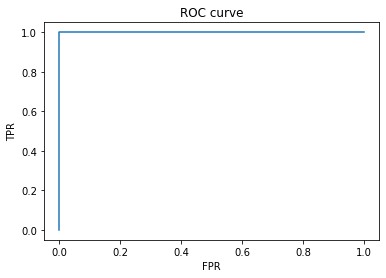

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

predictions = model.predict(X_test)

print(roc_auc_score(y_test, predictions))

fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Part 2

RandomForestClassifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0)
model = forest.fit(X_train, y_train)

1.0


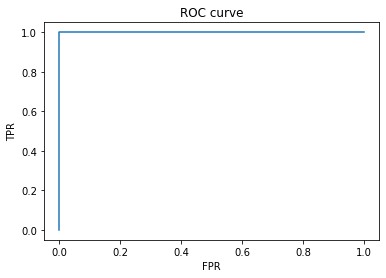

In [19]:
predictions = model.predict(X_test)

print(roc_auc_score(y_test, predictions))

fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### Part 3

AdaBoost

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier().fit(X_train, y_train)

1.0


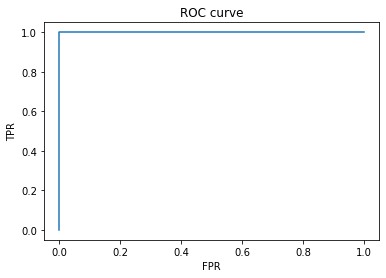

In [21]:
predictions = ada_model.predict(X_test)

print(roc_auc_score(y_test, predictions))

fpr, tpr, _ = roc_curve(y_test, predictions)

plt.clf()
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()